<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/AIPROJECTFINALNAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract :**
Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.

**Attribute Information :**
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve.

**These are summarised below:**

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class

In [1]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout


**PHASE 1 --------- A,B,C,D,E,F,G,H,I,J,K**

In [2]:
# PHASE 1
# A) Load the dataset
data = pd.read_csv('HTRU_2_AIDATASET.csv')

In [3]:

# B) Show number of rows and columns
print(f"The dataset HTRU_2_AIDATASET has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset HTRU_2_AIDATASET has 17898 rows and 9 columns.


In [4]:
# C)-----Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64


In [5]:
# D)Shows first five rows of the dataset
data.head()




,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
# E)Let's obtain a brief overview of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<Axes: >

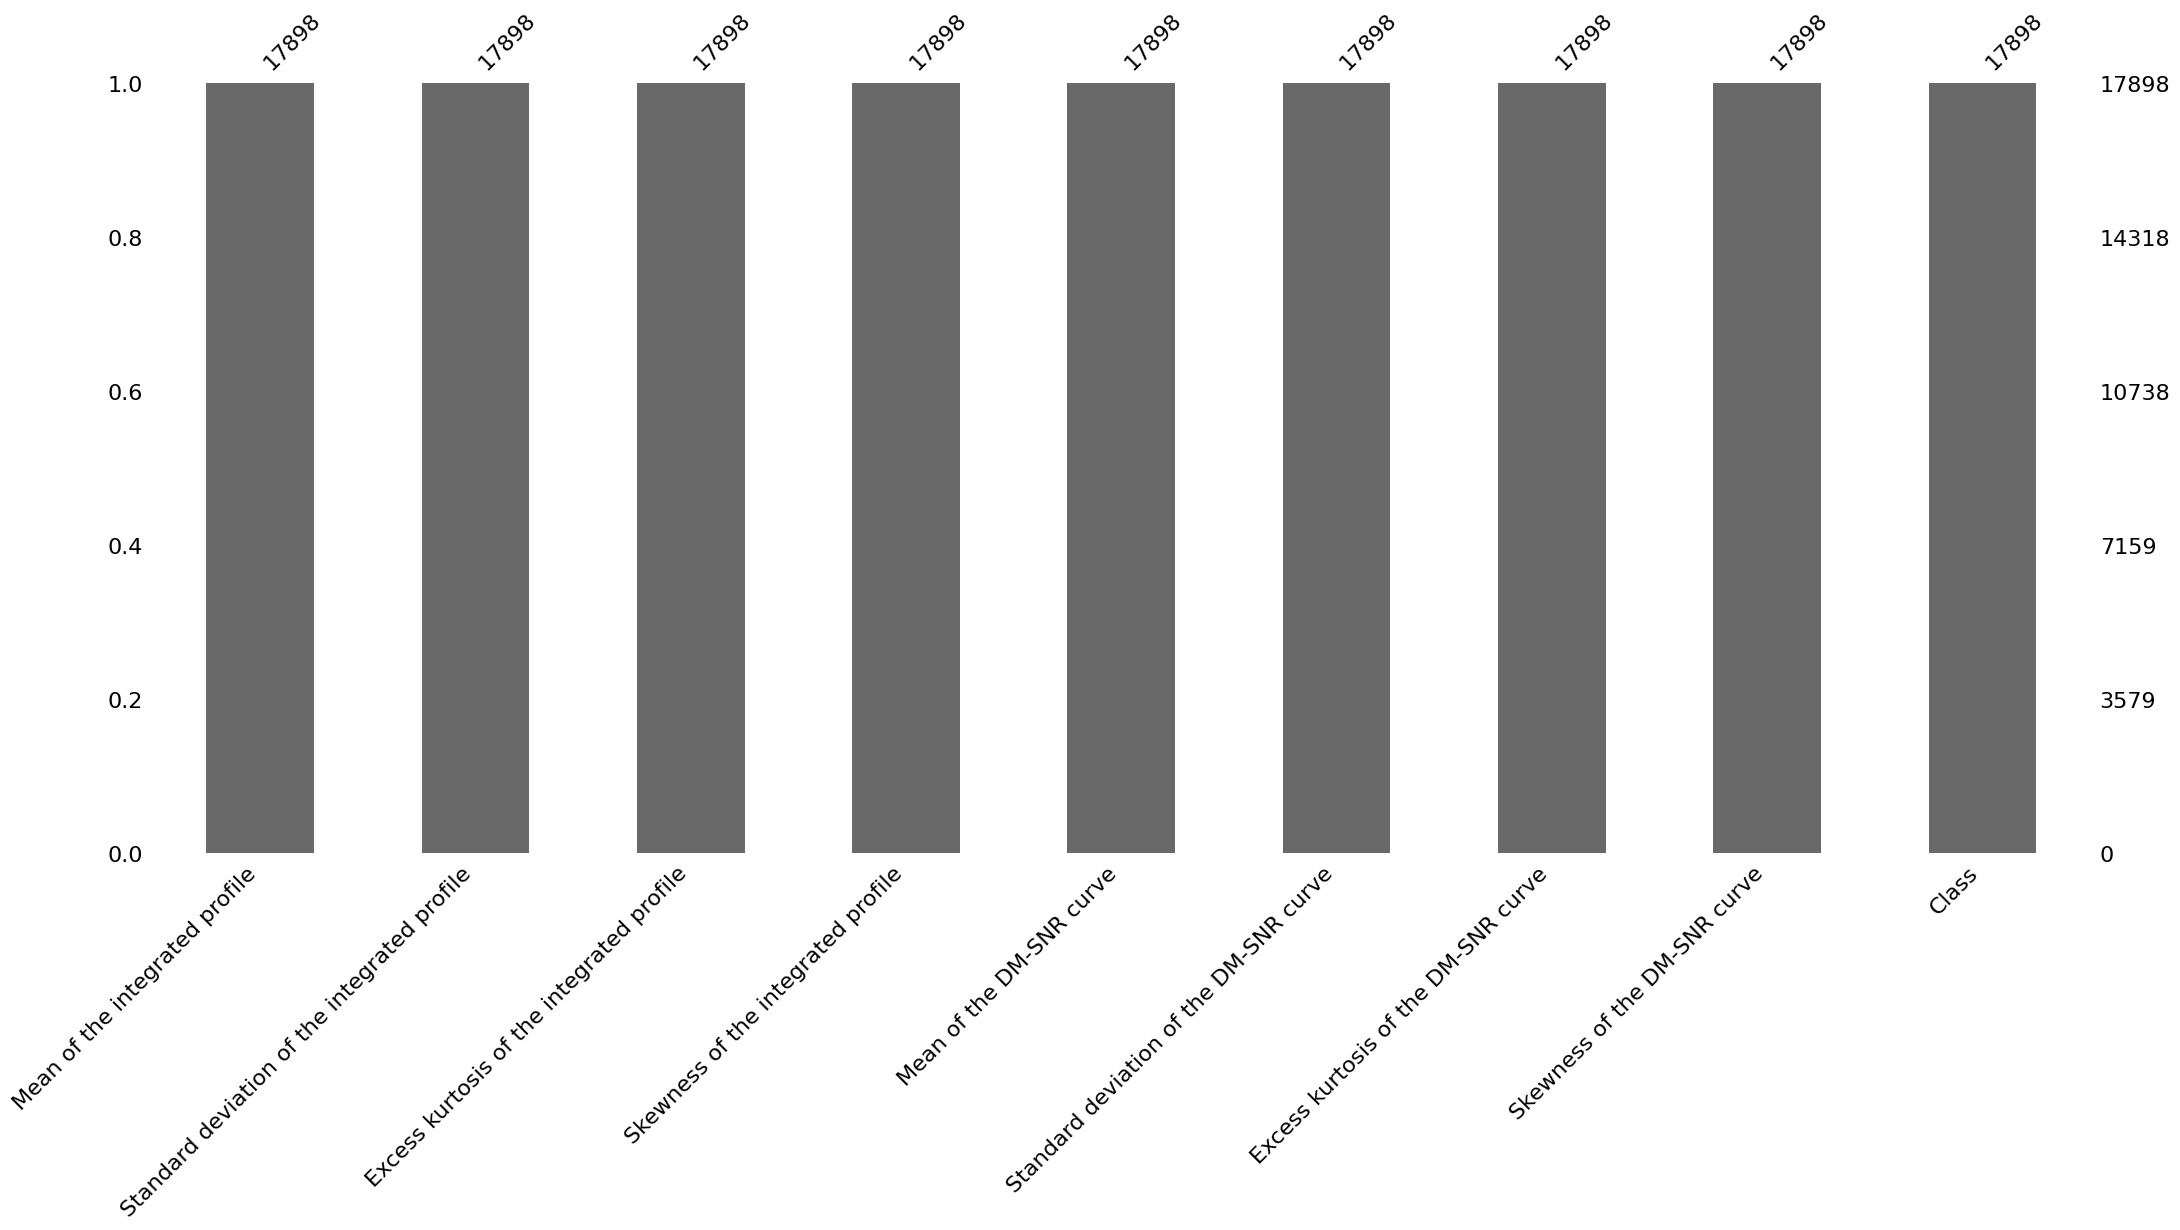

In [7]:
# F)Shows number of rows in each column with bar diagram
msno.bar(data)

In [8]:
# G) Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


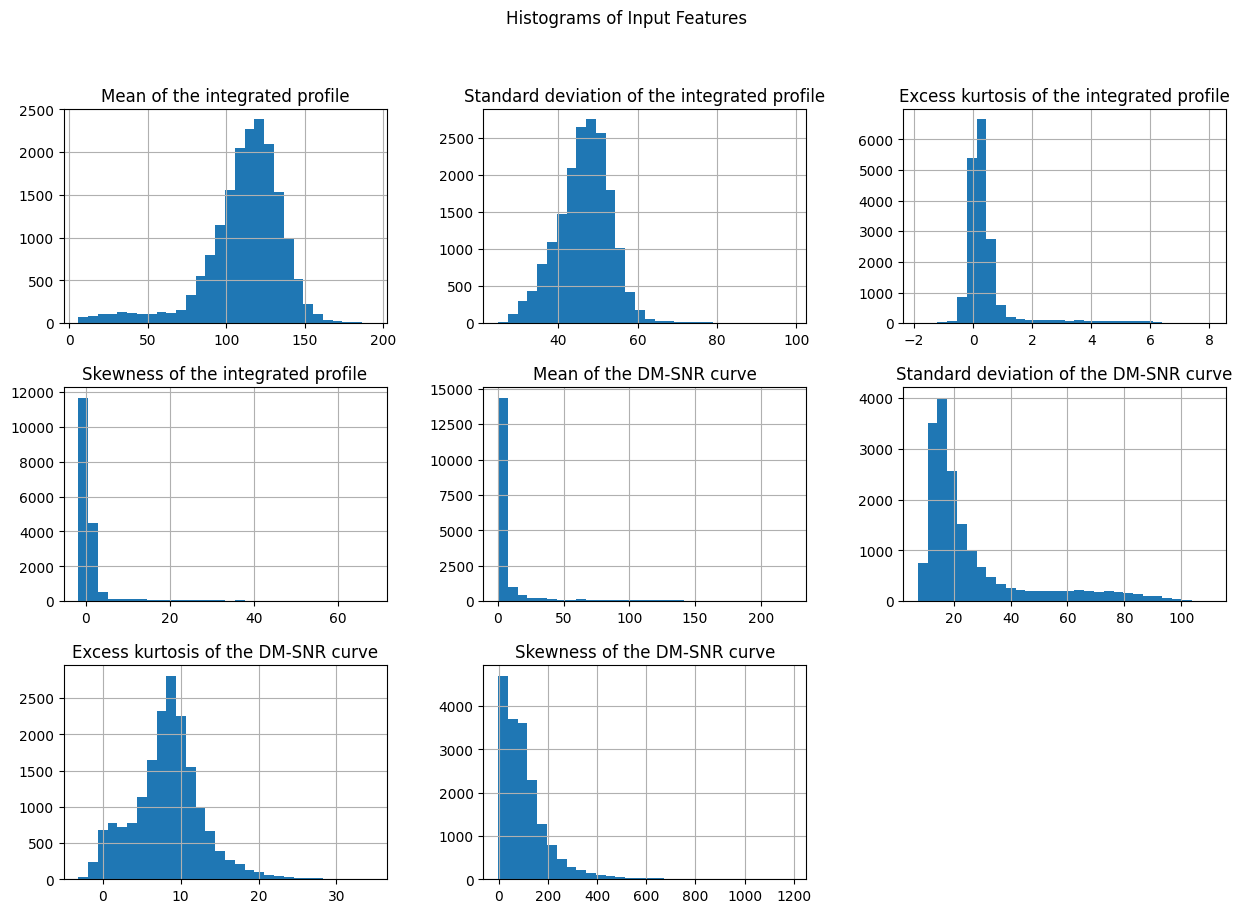

In [9]:
# H)Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

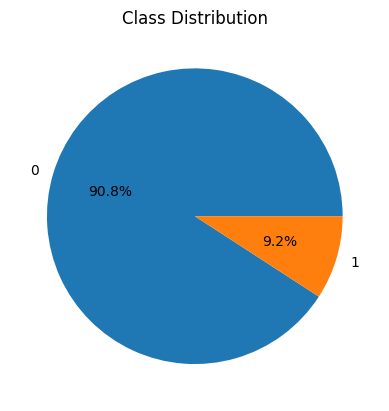

In [10]:
# I)Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

In [11]:
# J)Unique values of the dtatset
data.nunique()


Mean of the integrated profile                   8626
Standard deviation of the integrated profile    17862
Excess kurtosis of the integrated profile       17897
Skewness of the integrated profile              17898
Mean of the DM-SNR curve                         9000
Standard deviation of the DM-SNR curve          17894
Excess kurtosis of the DM-SNR curve             17895
Skewness of the DM-SNR curve                    17895
Class                                               2
dtype: int64

In [12]:

# K) Normalize the data
#X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

data_normalized = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data_normalized['Class'] = data.iloc[:, -1]


.....................................................................................  **PHASE 2** ................**L,M,N,O,P,Q**..............................................................................................

In [13]:
# PHASE 2

# L)NOW BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# M)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# N)Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))



Epoch 1/10
560/560 [==============================] - 2s 2ms/step - loss: 1.4476 - accuracy: 0.9137
Epoch 2/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9637
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9689
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9714
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9730
Epoch 6/10
560/560 [==============================] - 1s 1ms/step - loss: 0.0932 - accuracy: 0.9742
Epoch 7/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9741
Epoch 8/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9750
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9741
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9744

In [14]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS
# PART 2: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))

Epoch 1/10
560/560 [==============================] - 2s 2ms/step - loss: 0.2604 - accuracy: 0.9564
Epoch 2/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9722
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9722
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9731
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9736
Epoch 6/10
560/560 [==============================] - 2s 4ms/step - loss: 0.0960 - accuracy: 0.9731
Epoch 7/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9737
Epoch 8/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9738
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9747
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9731

In [ ]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 2
# PART 3: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(64, activation='relu', input_dim=8))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))



In [ ]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 3
# PART 4: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




In [ ]:
"""# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))
"""



In [ ]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4 BUT WITH DROPOUT FEATURE ADDED
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))'''




..................................................................................................  **PHASE 3**  ...........................................................................................................................

In [15]:
# PHASE 3


# R) Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [16]:
# S) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]

In [17]:
# T) Plotting, graphs, visualization
# Train model with checkpointing
# Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
history = multi_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, callbacks=[checkpoint])


Epoch 1/30
448/448 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9742 - val_loss: 0.0958 - val_accuracy: 0.9718
Epoch 2/30
448/448 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.9749 - val_loss: 0.0857 - val_accuracy: 0.9723
Epoch 3/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9753 - val_loss: 0.0898 - val_accuracy: 0.9715
Epoch 4/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9746 - val_loss: 0.0951 - val_accuracy: 0.9751
Epoch 5/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9755 - val_loss: 0.0851 - val_accuracy: 0.9768
Epoch 6/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9765 - val_loss: 0.0891 - val_accuracy: 0.9760
Epoch 7/30
448/448 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9760 - val_loss: 0.0844 - val_accuracy: 0.9760
Epoch 

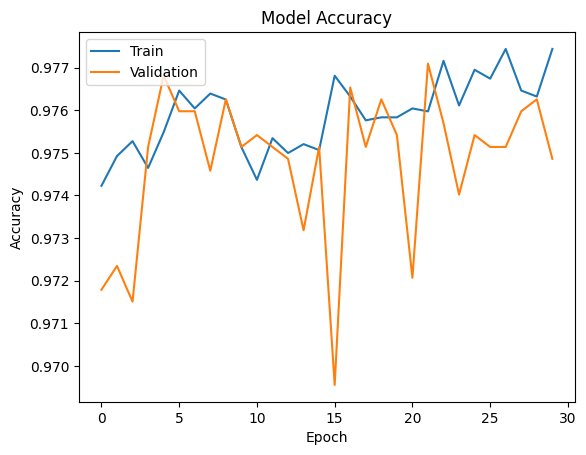

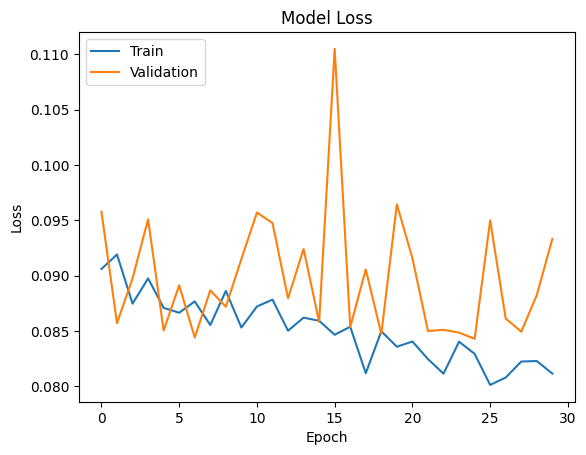

In [18]:
# U)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
# V) Gradually grow model (Not necessary as this example model achieves good accuracy)

# W) Print accuracy and loss on both training and validation dataset
_, train_accuracy = multi_layer_model.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = multi_layer_model.evaluate(X_val, y_val, verbose=1)
print('Training Accuracy: %.2f' % (train_accuracy * 100))
print('Validation Accuracy: %.2f' % (val_accuracy * 100))

# X) Print recall, precision, F1-score
y_val_pred = (multi_layer_model.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)


112/112 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9749
Training Accuracy: 97.59
Validation Accuracy: 97.49
112/112 [==============================] - 0s 1ms/step
Recall: 0.74
Precision: 0.96
F1 Score: 0.84


......................... **PHASE 4** ...............................

In [20]:

# PHASE 4

# N) Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=1)
    val_accuracies.append(single_feature_val_accuracy)




Epoch 1/10
448/448 [==============================] - 1s 2ms/step - loss: 0.2934 - accuracy: 0.8652
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.2041 - accuracy: 0.9076
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1999 - accuracy: 0.9084
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1948 - accuracy: 0.9114
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9158
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.9202
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1787 - accuracy: 0.9245
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1735 - accuracy: 0.9285
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9325
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9422

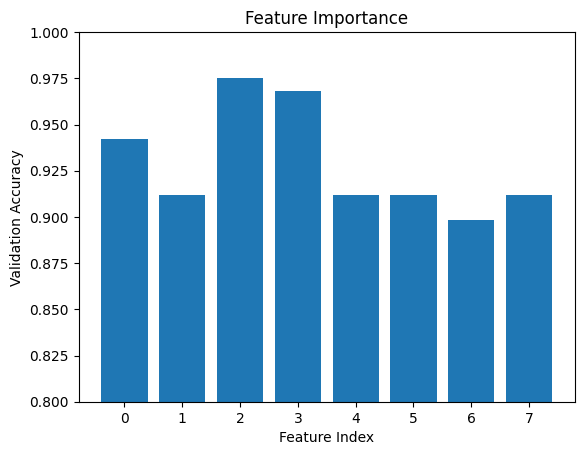

In [21]:
# Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()

In [22]:

# Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)





Epoch 1/10
448/448 [==============================] - 1s 2ms/step - loss: 0.6146 - accuracy: 0.9076
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4948 - accuracy: 0.9076
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4193 - accuracy: 0.9076
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.9076
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.9076
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.9076
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.9076
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3129 - accuracy: 0.9076
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.9076
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.9117

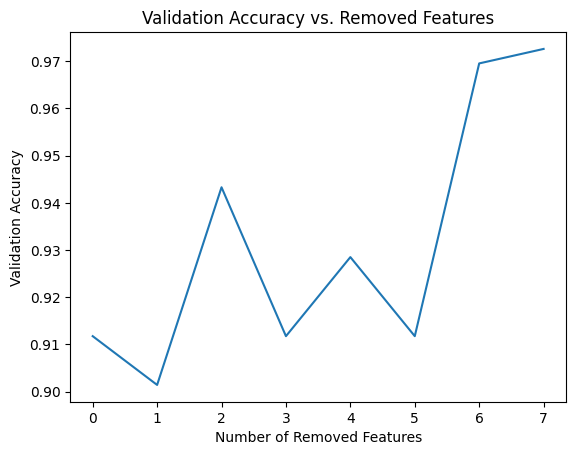

In [23]:
# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()